# The Essence of Fractal Geometry

By Stanley Salim

---

This is an interactive notebook about brief introduction to the world of mathematics in a surprisingly different perspective. Intended as an individual research project, this explainer aims to bring the reader on a journey to a new geometry that is closely related to our everyday life.

### Recommended Prerequisites

1. Set Theory
2. Linear Algebra
3. Measure Theory
4. Analytic Geometry
5. Python Programming (optional)

### How To Use

This Jupyter notebook is written alternatingly between HTML texts with MathJax typesetting (called **markdown cells**) and Python lines for examples and visualisations (called **code cells**). 

The markdown cells can be read solely as lecture note without understanding the contents of the code cells which is used for visualisation purpose. However, having some programming background has an upperhand, namely one can tweak the parameters in some indicated code lines (those with comments) to play around the pictures as experiment and it can help with the understanding.

## From An Intuitive Motivation

We start off from a simple motivation and move on to a more rigorous math as the note grows.

<img src="https://github.com/BerryStorm/fractal/blob/main/images/raphHowald_headland_unsplash.jpg?raw=1" alt="headland" width="33%"/>
<img src="https://github.com/BerryStorm/fractal/blob/main/images/janHuber_tree_unsplash.jpg?raw=1" alt="tree" width="33%"/>
<img src="https://github.com/BerryStorm/fractal/blob/main/images/osmanRana_ice-crystal_unsplash.jpg?raw=1" alt="frost" width="33%"/>

Consider a piece of paper. On our human scale level, we see that the surface of a paper feels and looks smooth. But imagine zooming the paper to a microscopic scale, and we can guess that the surface of a paper is actually pretty rough. If our physical body is shrunk down to a considerably small scale level and we stand on the surface of the paper, it is most likely that the surface is not really flat and smooth, but rather wavy and fabricated.

This somehow gives us an idea that almost every object that we can see is "rough". And in mathematics, we want to make sure what we mean by roughness precisely. This raises the idea of finding some other objects that are, in some sense, not necessarily smooth. And some of the most interesting instance of these are the so called "self-similar sets", whatever that mean. The pictures that we see in the beginning of this note are some real-life examples of these "self-similar" objects, but we will make it clear what we mean by that soon.

### Motivating Examples

Firstly, we are going to need some useful Python packages as a groundwork for the visualisation.

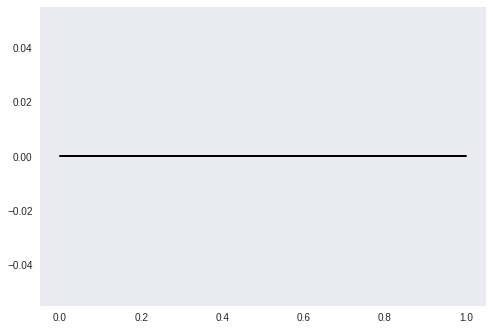

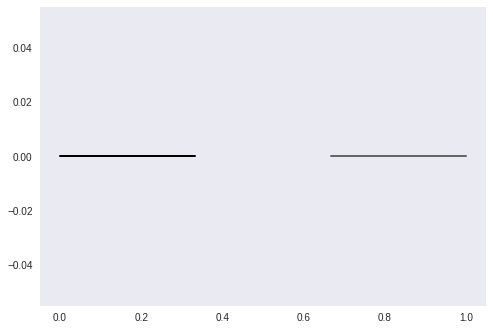

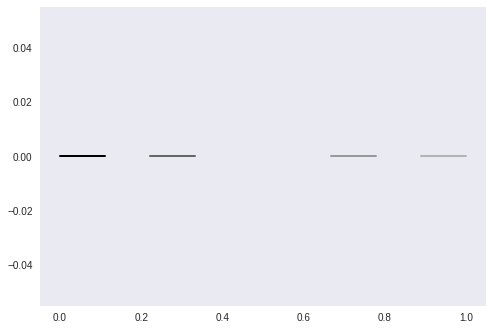

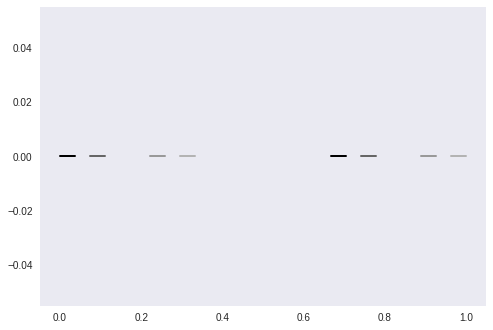

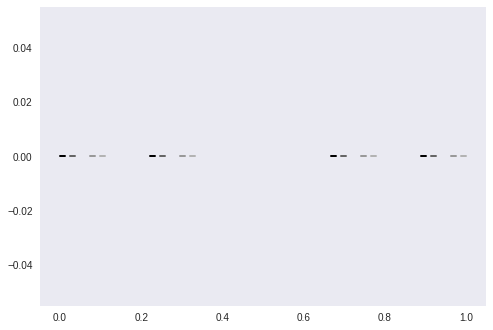

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
import sympy
import copy

class Cylinder:
    """
    Class representing a cylinder of a self-similar set.
    """

    def __init__(self, start, end):
        """
        Initialize a Cylinder object.
        
        Parameters:
            start : Tuple representing the initial coordinate of the cylinder.
            end   : Tuple representing the terminal coordinate of the cylinder.
        """
        self.start = start
        self.end = end


class IFS:
    """
    Class representing an iterated function systems of a self-similar set.
    """

    def __init__(self, family):
        """
        Initialize an IFS object.
        
        Parameters:
            family : Tuple containing family of Lipschitz functions.
        """
        self.fn = family

class Fractal:
    """
    Class representing a self-similar set.
    """

    def __init__(self, cylinder, ifs, n=1):
        """
        Initialize a Fractal object.
        
        Parameters:
            cylinder : List representing the cylinder(s) for the self-similar set.
            ifs      : Tuple representing the iterated function systems of the self-similar set.
            n        : Positive integer representing the level of iteration(s). (1 by default)
        """
        self.cyl = cylinder
        self.ifs = ifs
        self.lvl = n
    
    def add_ifs(self):
        """
        Define a new function for the ifs.
        """
        pass

    def mod_ifs(self):
        """
        Modify the current ifs.
        """
        pass

    def next(self):
        """
        Increase the cylinder level by one.
        """
        pass

    def plot(self, level):
        """
        Plot the fractal at the given level.
        """
        pass

cantor = [
            [[0, 0], [1, 0]]
        ]

def f1(cylinder):
    new_cylinder = copy.deepcopy(cylinder)
    new_cylinder[0] = [cylinder[0][0], cylinder[0][1]]
    new_cylinder[1] = [cylinder[0][0]+1/3*(cylinder[1][0]-cylinder[0][0]), cylinder[1][1]]
    return new_cylinder

def f2(cylinder):
    new_cylinder = copy.deepcopy(cylinder)
    new_cylinder[0] = [cylinder[0][0]+2/3*(cylinder[1][0]-cylinder[0][0]), cylinder[1][1]] 
    new_cylinder[1] = [cylinder[1][0], cylinder[1][1]]
    return new_cylinder

def make_cyl(base, n=1):
    if n==1:
        return base
    
    fractal = []
    for cylinder in base:
        fractal.append(f1(cylinder))
        fractal.append(f2(cylinder))
    return make_cyl(fractal, n-1)


def plot(base, level=2):

    n = level
    fractal = make_cyl(base, n)

    plt.style.use('seaborn-dark')
    # plt.axis('off')

    # plt.figure(figsize=(10,6))
    # plt.subplot(131)

    for cylinder in fractal:
        x = [coor[0] for coor in cylinder]
        y = [coor[1] for coor in cylinder]

        plt.plot(x, y)
    plt.show()

# koch = plt.figure()
# koch.plot([0,0], [1, 1])

for i in range(1, 6):
    plot(cantor, i)

[[[0, 0], [1, 0]]]

[[[0, 0], [0.3333333333333333, 0]], [[0.6666666666666666, 0], [1, 0]]]

[[[0, 0], [0.1111111111111111, 0]], [[0.2222222222222222, 0], [0.3333333333333333, 0]], [[0.6666666666666666, 0], [0.7777777777777778, 0]], [[0.8888888888888888, 0], [1, 0]]]

[[[0, 0], [0.037037037037037035, 0]], [[0.07407407407407407, 0], [0.1111111111111111, 0]], [[0.2222222222222222, 0], [0.25925925925925924, 0]], [[0.2962962962962963, 0], [0.3333333333333333, 0]], [[0.6666666666666666, 0], [0.7037037037037037, 0]], [[0.7407407407407407, 0], [0.7777777777777778, 0]], [[0.8888888888888888, 0], [0.9259259259259259, 0]], [[0.9629629629629629, 0], [1, 0]]]


Let's see some examples of the so-called "self-similar" sets.

#### Sierpiński Triangle (generalise it to n-flakes with other n-gons)

To understand why the Sierpiński triangle is called self-similar, we look at its simplest construction:

1. Start with the unit-side-length equilateral triangle $\triangle ABC$.

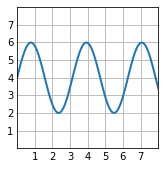

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()


2. Remove the triangle formed by the midpoints of $\triangle ABC$ (without its sides) and keep the rest. This way, we get three copies of similar triangles with the original triangle, scaled down by the (length) ratio of $\frac{1}{2}$.

3. Repeat step 2 for each of the three smaller triangles again and again forever. The remaining colored region that remains after infinitely many iterations is the mysterious Sierpiński triangle.

The code shown above is the first five iterations of the procedure, hence an approximation of the self-similar Sierpiński triangle.

Now that we know how it looks like, let's take a detour at another construction from different viewpoint. This time, we are going to use a bit of linear algebra on $\R^2$:

1. 

Turtle()

2. 

3. 

This second construction will be our main attention across this note, because we can get more insights from it, namely:

1. There is a contraction ratio c
2. there is a linear transformation
3. These linear transformation can be composed to represent each similar copies, and that is where the name "self-similar set" come from.

Now, we will turn our attention to another example of self-similar sets. But, instead of playing around with planar objects (in this case, triangles), we will focus on line-based objects (segments).

#### Heighway Dragon (generalise it to dragon curves in the code)

As the name suggests, the Heighway Dragon is one of the coolest self-similar sets. This example will give us an idea that self-similar sets are not completely "self-similar", but just "self-similar-ish". Let's construct it by similar linear-algebraic way:

1. 

2. 

3. 

This gives us an idea that even a self-similar set that is constructed by lines (curves) can fill the space! A curve with this property is called a space-filling curve and discovered by Peano in ...

To make sure that we understand the basic notion of self-similar sets, contracting ratios, and iterated functions systems, we are going to look at one last interactive example where we can play around with it. 

#### (Variation of Koch Snowflakes/minkowski sausage, n-flake)

In this last example, we are going to make the notions as precise as we can and interact with the code as well, so as to get our hands on the heart of self-similar sets and verify our intuition about them.

The ... goes as follows:

1. 

2. 

3. 

### Cantor Set

Here is another classic example on the middle-third Cantor set.

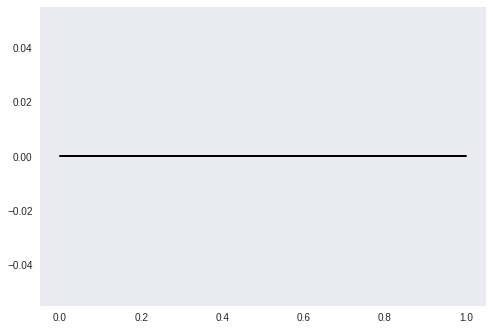

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
import sympy

class Fractal:
    def __init__(self, cylinder, iterated_function_systems, level=1):
        self.cyl = cylinder
        self.ifs = iterated_function_systems
        self.lvl = level
    
    def add_ifs(self):
        """
        Define a new function for the ifs.
        """
        pass

    def mod_ifs(self):
        """
        Modify the current ifs.
        """
        pass

    def next(self):
        """
        Increase the cylinder level by one.
        """
        pass

    def plot(self, level):
        """
        Plot the fractal at the given level.
        """
        pass

cantor = [(0, 0), (1, 0)]

def cantor_ifs():
    return None

def plot_fractal():
    plt.style.use('seaborn-dark')
    # plt.axis('off')

    # plt.figure(figsize=(10,6))
    # plt.subplot(131)

    
    x = [pt[0] for pt in cantor]
    y = [pt[1] for pt in cantor]

    plt.plot(x, y)
    
    plt.show()

# koch = plt.figure()
# koch.plot([0,0], [1, 1])

plot_fractal()

In [ ]:
l = [[1, 2], [3, 4], [5, 6]]
l1 = [i[0] for i in l]
print(l1)

[1, 3, 5]


### Self-Similar Sets

Something explaining the self-similar sets

---

## Onto Formal Preliminaries

self-similar sets

contraction ratio

lipschitz mapping

linear mapping

iterated functions system

symbolic space

attractor

---

## Some Similarity Dimensions

### Notions

#### Box counting dimension

#### Hausdorf dimension

---

## Well-Separated VS Overlapping Cylinders

####

####

---

## Graph Directed Iterated Function Systems

#### ...

$\int_0^{\infty} x^2\,dx$

sqrt(3)